<a href="https://colab.research.google.com/github/thoriqnaja/project-UAS/blob/main/Prediksi_Sakit_Jantung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Muhammad Thoriqun Najah
# Prediksi
import pandas as pd

df = pd.read_csv('Heart_Disease_Prediction.csv')

df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

<ipython-input-5-aefb460be4fe>:20: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

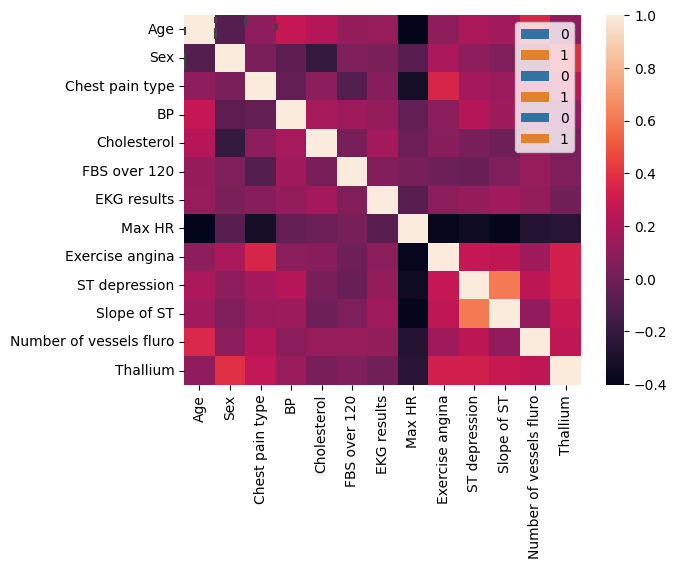

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df['Heart Disease'],hue='Sex',data=df)

sns.barplot(x=df['Heart Disease'],y=df['Exercise angina'],data=df)

sns.barplot(x=df['Sex'],y=df['Exercise angina'],hue='Sex',data=df)

sns.barplot(x=df['Sex'],y=df['Cholesterol'],hue='Sex',data=df)

sns.barplot(x=df['Heart Disease'],y=df['Cholesterol'],hue='Heart Disease',data=df)

sns.lineplot(x=df['Age'],y=df['Cholesterol'],data=df)

sns.lineplot(x=df['Age'],y=df['ST depression'],data=df)

sns.barplot(x=df['Heart Disease'],y=df['ST depression'],data=df)

sns.heatmap(df.corr())

In [ ]:
# Split the data into features (X) and target variable (y)
X = df.drop(columns=['Heart Disease'])
y = df['Heart Disease'].map({'Presence': 1, 'Absence': 0})

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)


Epoch 1/50
7/7 - 3s - loss: 0.6261 - accuracy: 0.6574 - val_loss: 0.5956 - val_accuracy: 0.7593 - 3s/epoch - 445ms/step
Epoch 2/50
7/7 - 0s - loss: 0.5185 - accuracy: 0.8194 - val_loss: 0.5022 - val_accuracy: 0.8704 - 146ms/epoch - 21ms/step
Epoch 3/50
7/7 - 0s - loss: 0.4442 - accuracy: 0.8380 - val_loss: 0.4299 - val_accuracy: 0.8704 - 192ms/epoch - 27ms/step
Epoch 4/50
7/7 - 0s - loss: 0.3898 - accuracy: 0.8472 - val_loss: 0.3788 - val_accuracy: 0.9074 - 215ms/epoch - 31ms/step
Epoch 5/50
7/7 - 0s - loss: 0.3596 - accuracy: 0.8472 - val_loss: 0.3489 - val_accuracy: 0.9074 - 200ms/epoch - 29ms/step
Epoch 6/50
7/7 - 0s - loss: 0.3408 - accuracy: 0.8519 - val_loss: 0.3346 - val_accuracy: 0.8889 - 214ms/epoch - 31ms/step
Epoch 7/50
7/7 - 0s - loss: 0.3296 - accuracy: 0.8426 - val_loss: 0.3242 - val_accuracy: 0.8889 - 99ms/epoch - 14ms/step
Epoch 8/50
7/7 - 0s - loss: 0.3188 - accuracy: 0.8565 - val_loss: 0.3187 - val_accuracy: 0.8704 - 190ms/epoch - 27ms/step
Epoch 9/50
7/7 - 0s - loss:

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy}")

df.head()

In [ ]:
#data baru
import numpy as np

new_data = np.array([[32, 1, 2, 115, 260, 1, 0, 170, 1, 1.6, 1, 0, 3]])  # Presence/absence tidak dimasukkan (target)
new_data_scaled = scaler.transform(new_data)

# Prediksi dengan menggunakan madel yang telah dilatih
predictions = model.predict(new_data_scaled)

# konversi ke yes atau no dengan  threshold (0.5)
binary_predictions = (predictions > 0.5).astype(int)


#
print(f"Predicted Probability: {predictions[0][0]}")
print(f"Binary Prediction: {binary_predictions[0][0]}")
print()

if (binary_predictions==0):
    print("Absence...")
else:
    print("Presence")

print()

1/1 [==============================] - 0s 127ms/step
Predicted Probability: 9.894427785184234e-05
Binary Prediction: 0

Absence...



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
